In [1]:
# Read the March 2012 power data from the data folder.
import pandas as pd
df = pd.read_csv("../data/2012-03-power-survey-london.csv")

In [2]:
df.head()

,datetime,A_sigma,B_sigma,C_sigma,D_sigma,E_sigma,F_sigma,G_sigma,H_sigma,I_sigma,...,L_count,M_count,N_count,O_count,P_count,Q_count,U_count,mean,count,sigma
0,2012-03-01 00:00:00,5.392,0.071,3.281,10.460,67.476,15.779,3.604,5.582,0.108,...,24,7,4,4,27,98,6,0.199526,713,142.262000
1,2012-03-01 00:30:00,4.260,0.103,3.339,12.095,112.171,15.190,7.460,5.615,0.093,...,24,7,4,4,27,98,6,0.366079,713,261.013999
2,2012-03-01 01:00:00,4.934,0.107,2.209,11.101,99.883,13.766,6.367,4.294,0.114,...,24,7,4,4,27,98,6,0.326027,713,232.457000
3,2012-03-01 01:30:00,4.025,0.100,1.686,10.198,87.321,12.623,6.271,4.104,0.077,...,24,7,4,4,27,98,6,0.285386,713,203.480001
4,2012-03-01 02:00:00,3.758,0.106,1.386,9.875,80.473,10.177,6.120,2.663,0.119,...,24,7,4,4,27,98,6,0.249255,713,177.719000


In [3]:
from datetime import datetime
#type(df['datetime'][0])
#date_time_obj = datetime.strptime(df['datetime'][0], "%m/%d/%Y %H:%M")

# Create two functions that will allow us to create data based on the data in each row.

def dayCalc(row):
    return pd.to_datetime(row['datetime']).day

def tstampCalc(row):
    return f"{pd.to_datetime(row['datetime']).hour}:{pd.to_datetime(row['datetime']).minute:02}"

# Create new columns for the day of the month and also a column for the time stamp (e.g. 20:30).

df['day'] = df.apply(dayCalc, axis = 1)
df['tstamp'] = df.apply(tstampCalc, axis = 1)

# Could also do it with a lambda.
#df['day'] = pd.to_datetime(df['datetime'])
#df['day'] = df.apply(lambda row: pd.to_datetime(row['datetime']).day, axis = 1)

In [4]:
# Create a plotting function to plot the energy consumption associated with a dataframe.

def eventPlotter(dfx, title, tsb, tse):
    import matplotlib.pyplot as plt
    %matplotlib inline
    plt.figure(figsize=(12,4))
    plt.plot(dfx["tstamp"],dfx["sigma"])
    plt.xticks(rotation='vertical')
    plt.title(title)
    plt.xlabel("time stamp")
    plt.ylabel("Energy Consumption (kW-h/hh")
    plt.grid()
    plt.plot([tsb, tse], [160, 160], color='r', linestyle='-', linewidth=2)
    plt.show()

In [5]:
# Create a dataframe representing energy consumption for March 11th 2012, the day
# of the England vs. France game.

df_England_France_3_11 = df.loc[df['day']==11]
df_England_France_3_11 = df_England_France_3_11.set_index(df_England_France_3_11["tstamp"])
df_England_France_3_11.head(5)

,datetime,A_sigma,B_sigma,C_sigma,D_sigma,E_sigma,F_sigma,G_sigma,H_sigma,I_sigma,...,N_count,O_count,P_count,Q_count,U_count,mean,count,sigma,day,tstamp
tstamp,,,,,,,,,,,,,,,,,,,,,
0:00,2012-03-11 00:00:00,7.829,0.064,3.489,12.441,81.296,17.642,3.959,7.029,0.138,...,4,4,30,106,6,0.220654,781,172.331000,11,0:00
0:30,2012-03-11 00:30:00,6.424,0.076,1.872,12.346,121.990,16.942,7.603,8.054,0.057,...,4,4,30,106,6,0.374031,781,292.118000,11,0:30
1:00,2012-03-11 01:00:00,4.440,0.108,1.864,11.627,117.371,16.567,7.209,7.348,0.135,...,4,4,30,106,6,0.336401,781,262.729000,11,1:00
1:30,2012-03-11 01:30:00,5.591,0.099,1.693,10.825,100.095,14.889,6.889,5.319,0.059,...,4,4,30,106,6,0.289138,781,225.817000,11,1:30
2:00,2012-03-11 02:00:00,5.334,0.064,1.273,9.254,90.385,13.313,6.827,3.429,0.104,...,4,4,30,106,6,0.252055,781,196.855001,11,2:00


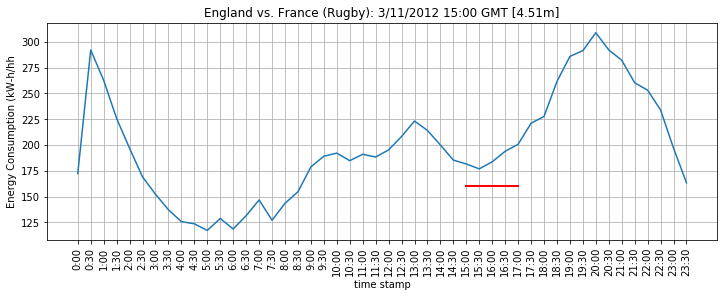

In [6]:
# Enter details for the England vs. France game, which took place on day 11
# between 15:00 and 17:00 (approx).

dfevent = df_England_France_3_11
title   = "England vs. France (Rugby): 3/11/2012 15:00 GMT [4.51m]"
tsb     = '15:00'
tse     = '17:00'

# Plot the day's energy consumption.

eventPlotter(dfevent, title, tsb, tse)

In [7]:
# Create a dataframe representing energy consumption for March 17th 2012, the day
# of the England vs. Ireland game.

df_England_Ireland_3_17 = df.loc[df['day']==17]
df_England_Ireland_3_17 = df_England_Ireland_3_17.set_index(df_England_Ireland_3_17["tstamp"])
df_England_Ireland_3_17.head(5)

,datetime,A_sigma,B_sigma,C_sigma,D_sigma,E_sigma,F_sigma,G_sigma,H_sigma,I_sigma,...,N_count,O_count,P_count,Q_count,U_count,mean,count,sigma,day,tstamp
tstamp,,,,,,,,,,,,,,,,,,,,,
0:00,2012-03-17 00:00:00,16.368,0.176,6.960,34.238,175.652001,35.724,6.964,15.912,0.352,...,10,14,60,236,12,0.215465,1738,374.478001,17,0:00
0:30,2012-03-17 00:30:00,6.373,0.133,2.193,15.269,129.152000,17.124,7.425,5.938,0.161,...,5,7,30,118,6,0.346852,869,301.414000,17,0:30
1:00,2012-03-17 01:00:00,5.028,0.072,1.897,13.786,117.226000,16.221,7.228,5.008,0.150,...,5,7,30,118,6,0.309528,869,268.980001,17,1:00
1:30,2012-03-17 01:30:00,5.397,0.060,1.677,14.122,103.690001,14.825,6.789,3.466,0.227,...,5,7,30,118,6,0.270871,869,235.387001,17,1:30
2:00,2012-03-17 02:00:00,4.573,0.153,1.553,12.610,94.408000,12.933,6.877,3.370,0.169,...,5,7,30,118,6,0.239830,869,208.412000,17,2:00


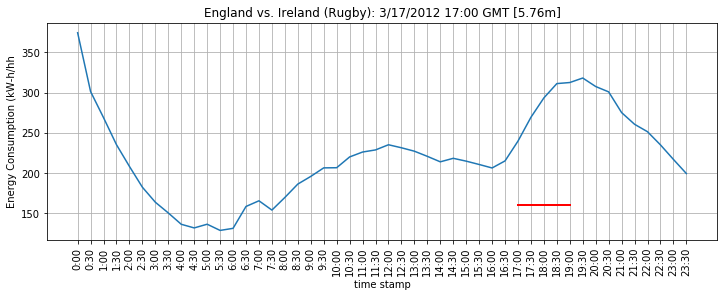

In [8]:
# Enter details for the England vs. Ireland game, which took place on day 17
# between 17:00 and 19:00 (approx).

dfevent = df_England_Ireland_3_17
title   = "England vs. Ireland (Rugby): 3/17/2012 17:00 GMT [5.76m]"
tsb     = '17:00'
tse     = '19:00'

# Plot the day's energy consumption.

eventPlotter(dfevent, title, tsb, tse)